# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')
data

Rank Release_Date                     Movie_Title USD_Production_Budget  \
0     5293     8/2/1915           The Birth of a Nation              $110,000   
1     5140     5/9/1916                     Intolerance              $385,907   
2     5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3     5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4     5222     1/1/1925                  The Big Parade              $245,000   
...    ...          ...                             ...                   ...   
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020                     Singularity          $175,000,000   
5389  1119   12/31/2020          Hannibal the Conqueror           $50,000,000   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The           $20,000,000   

     USD_Worldwide_Gross USD_Domestic_Gross  
0            $11,000,000        $10,000,000  
1                     $0                 $0  
2             $8,000,000         $8,000,000  
3             $3,000,000         $3,000,000  
4            $22,000,000        $11,000,000  
...                  ...                ...  
5386                  $0                 $0  
5387                  $0                 $0  
5388                  $0                 $0  
5389                  $0                 $0  
5390                  $0                 $0  

[5391 rows x 6 columns]

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


In [5]:
data.shape

(5391, 6)

In [6]:
if not data.isna().values.any():
    print('No NaN found...')
else:
    print('NaN found')

No NaN found...


In [7]:
if not data.duplicated().values.any():
    print('no duplications found')
else:
    print('duplications found')

no duplications found


In [8]:
print(data.duplicated().sample())
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

4749    False
dtype: bool


0

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
chars_to_remove = ['$', ',']
series_to_clean = ['USD_Production_Budget', 'USD_Domestic_Gross', 'USD_Worldwide_Gross']

for serie in series_to_clean:
    # replace chars
    for character in chars_to_remove:
        data[serie] = data[serie].astype(str).str.replace(character, '', regex=False)
    # convert to numeric
    data[serie] = pd.to_numeric(data[serie])

data.sample(5)

Rank Release_Date       Movie_Title  USD_Production_Budget  \
706   2250   12/29/1993       Shadowlands               22000000   
1512  1137   10/20/2000         Bedazzled               48000000   
2559   873    12/8/2005    The Great Raid               60000000   
2745   863    9/15/2006  The Black Dahlia               60000000   
210   4844     8/2/1976       Taxi Driver                1000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
706              25842377            25842377  
1512             90376224            37879996  
2559             10597070            10166502  
2745             49238525            22672813  
210              28316211            28262574

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.sample(5)

Rank Release_Date             Movie_Title  USD_Production_Budget  \
532   1510   1989-06-23                  Batman               35000000   
3105  3176   2008-03-10  Rachel Getting Married               12000000   
2639  2691   2006-03-31                     ATL               17000000   
1699  1566   2001-10-19               From Hell               35000000   
5212  1141   2016-07-13         The Infiltrator               47500000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
532             411348924           251188924  
3105             17475475            12796861  
2639             21170563            21170563  
1699             68712365            31598308  
5212             18329653            15436808

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [11]:
data.describe()

Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,100.00                 0.00                0.00
25%   1,348.50           5,000,000.00         3,865,206.00        1,330,901.50
50%   2,696.00          17,000,000.00        27,450,453.00       17,192,205.00
75%   4,043.50          40,000,000.00        96,454,455.00       52,343,687.00
max   5,391.00         425,000,000.00     2,783,918,982.00      936,662,225.00

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [12]:
grossed_0_domestic = data[data['USD_Domestic_Gross'] == 0]
grossed_0_domestic.sort_values('USD_Production_Budget', ascending=False)[4:]

Rank Release_Date                                   Movie_Title  \
5090   556   2015-12-31            Don Gato, el inicio de la pandilla   
4294   566   2012-12-31  Astérix et Obélix: Au service de Sa Majesté    
5058   880   2015-11-12                              The Ridiculous 6   
5338   879   2017-04-08                                The Dark Tower   
5389  1119   2020-12-31                        Hannibal the Conqueror   
...    ...          ...                                           ...   
4787  5371   2014-12-31                          Stories of Our Lives   
3056  5374   2007-12-31                                   Tin Can Man   
4907  5381   2015-05-19                              Family Motocross   
5006  5389   2015-09-29                       Signed Sealed Delivered   
5007  5390   2015-09-29                          A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5090               80000000              4547660                   0  
4294               77600000             60680125                   0  
5058               60000000                    0                   0  
5338               60000000                    0                   0  
5389               50000000                    0                   0  
...                     ...                  ...                 ...  
4787                  15000                    0                   0  
3056                  12000                    0                   0  
4907                  10000                    0                   0  
5006                   5000                    0                   0  
5007                   1400                    0                   0  

[508 rows x 6 columns]

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [13]:
grossed_0_worldwide = data[data.USD_Worldwide_Gross == 0]
grossed_0_worldwide.sort_values('USD_Production_Budget', ascending=False)

Rank Release_Date              Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31              Singularity              175000000   
5387   126   2018-12-18                  Aquaman              160000000   
5384   321   2018-09-03        A Wrinkle in Time              103000000   
5385   366   2018-10-08           Amusement Park              100000000   
5058   880   2015-11-12         The Ridiculous 6               60000000   
...    ...          ...                      ...                    ...   
4787  5371   2014-12-31     Stories of Our Lives                  15000   
3056  5374   2007-12-31              Tin Can Man                  12000   
4907  5381   2015-05-19         Family Motocross                  10000   
5006  5389   2015-09-29  Signed Sealed Delivered                   5000   
5007  5390   2015-09-29     A Plague So Pleasant                   1400   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0  
...                   ...                 ...  
4787                    0                   0  
3056                    0                   0  
4907                    0                   0  
5006                    0                   0  
5007                    0                   0  

[357 rows x 6 columns]

### Filtering on Multiple Conditions

In [14]:
international_releases = data.loc[ (data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0) ]
international_releases

Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  
...                   ...                 ...  
5340              1480089                   0  
5348             58807172                   0  
5360                27561                   0  
5372             48048527                   0  
5374                36630                   0  

[155 rows x 6 columns]

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [15]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0').sort_values('USD_Production_Budget', ascending=False)

Rank Release_Date                                   Movie_Title  \
5090   556   2015-12-31            Don Gato, el inicio de la pandilla   
4294   566   2012-12-31  Astérix et Obélix: Au service de Sa Majesté    
4295  1230   2012-12-31                                    Foodfight!   
5091  1271   2015-12-31              Pourquoi j'ai pas mangé mon père   
2836  1270   2006-12-31               Les Bronzés 3: amis pour la vie   
...    ...          ...                                           ...   
4862  5206   2015-03-24                            Along the Roadside   
5113  5267   2015-12-31                                 Lumea e a mea   
4535  5276   2013-12-31                                 Speak No Evil   
4072  5319   2011-12-31                                      Absentia   
4796  5359   2015-01-09                                      Backmask   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5090               80000000              4547660                   0  
4294               77600000             60680125                   0  
4295               45000000                73706                   0  
5091               42000000               182156                   0  
2836               42000000             83833602                   0  
...                     ...                  ...                 ...  
4862                 250000                 3234                   0  
5113                 168000                29827                   0  
4535                 150000                32927                   0  
4072                  70000                 8555                   0  
4796                  25000               428923                   0  

[155 rows x 6 columns]

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [16]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
future_releases = data[data.Release_Date >= scrape_date]
future_releases

Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000                    0                   0

In [17]:
# data_clean = data.drop(future_releases.index)
data_clean = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross != 0')
data_clean.copy

<bound method NDFrame.copy of       Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
5     4250   1925-12-30                           Ben-Hur   
...    ...          ...                               ...   
5378   914   2017-10-02               Fifty Shades Darker   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
0                    110000             11000000            10000000  
2                    200000              8000000             8000000  
3                    100

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [18]:
costs_gt_revenue = data_clean.query('USD_Worldwide_Gross < USD_Production_Budget')
print(f'{len(costs_gt_revenue)} / {len(data_clean)} = {costs_gt_revenue.shape[0] / data_clean.shape[0]}')

1543 / 4879 = 0.3162533306005329


# Seaborn for Data Viz: Bubble Charts

In [19]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



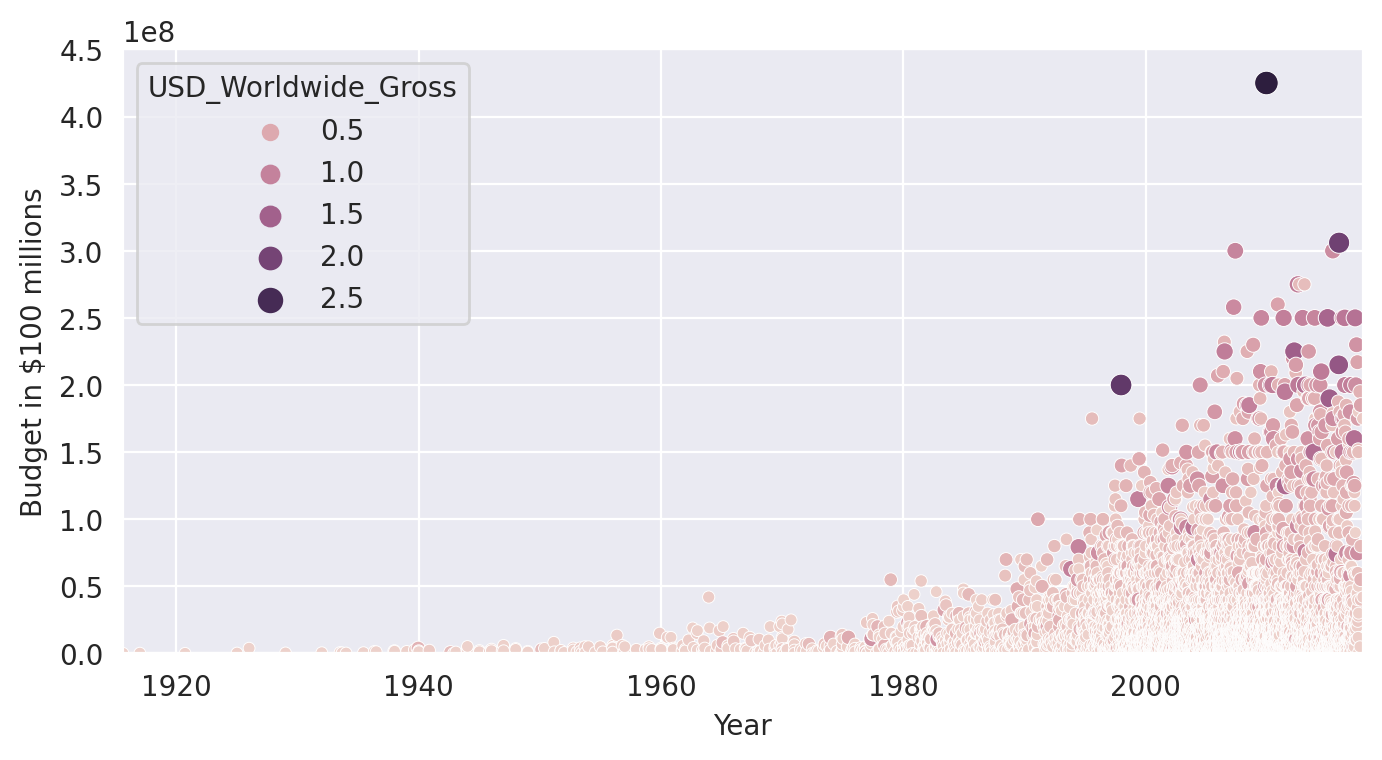

In [20]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=data_clean, 
        x='Release_Date', 
        y='USD_Production_Budget',
        hue='USD_Worldwide_Gross',
        size='USD_Worldwide_Gross',
        legend='brief'                    
    )

 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. <br>

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [21]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
print(dt_index)

DatetimeIndex(['1915-08-02', '1916-12-24', '1920-09-17', '1925-01-01',
               '1925-12-30', '1929-01-02', '1931-12-31', '1933-07-04',
               '1933-09-02', '1933-09-03',
               ...
               '2017-07-28', '2017-07-28', '2017-09-06', '2017-09-06',
               '2017-10-02', '2017-10-02', '2017-10-02', '2017-10-03',
               '2017-12-05', '2017-12-05'],
              dtype='datetime64[ns]', name='Release_Date', length=4879, freq=None)


In [22]:
print(dt_index.year)

Int64Index([1915, 1916, 1920, 1925, 1925, 1929, 1931, 1933, 1933, 1933,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=4879)


In [23]:
decades = dt_index.year // 10 * 10 # floor/integer division of 10 (only keeps whole numbers/integers) * 10 = decades
decades

Int64Index([1910, 1910, 1920, 1920, 1920, 1920, 1930, 1930, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=4879)

In [24]:
data_clean['Decades'] = decades
data_clean

Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
5     4250   1925-12-30                           Ben-Hur   
...    ...          ...                               ...   
5378   914   2017-10-02               Fifty Shades Darker   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Decades  
0                    110000             11000000            10000000     1910  
2                    200000              8000000             8000000     1910  
3                    100000              3000000             3000000     1920  
4                    245000             22000000            11000000     1920  
5                   3900000              9000000             9000000     1920  
...                     ...                  ...                 ...      ...  
5378               55000000            376856949           114434010     2010  
5379               40000000            166893990            92029184     2010  
5380              185000000            561137727           168052812     2010  
5381              175000000            140012608            39175066     2010  
5382               42000000             57850343            45850343     2010  

[4879 rows x 7 columns]

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [25]:
old_films = data_clean.query('Decades < 1970')
old_films.describe()

Rank  USD_Production_Budget  USD_Worldwide_Gross  \
count   142.00                 142.00               142.00   
mean  4,252.30           4,765,743.89        32,776,062.25   
std     756.50           5,868,631.89        56,348,314.90   
min   1,253.00             100,000.00            14,873.00   
25%   3,954.00           1,291,000.00         6,800,000.00   
50%   4,360.00           3,000,000.00        11,000,000.00   
75%   4,779.25           5,150,000.00        33,395,426.00   
max   5,299.00          42,000,000.00       390,525,192.00   

       USD_Domestic_Gross  Decades  
count              142.00   142.00  
mean        24,123,869.73 1,949.86  
std         33,263,640.60    12.26  
min             14,873.00 1,910.00  
25%          6,600,000.00 1,940.00  
50%         10,731,250.00 1,950.00  
75%         30,375,000.00 1,960.00  
max        198,680,470.00 1,960.00

In [26]:
new_films = data_clean.query('Decades > 1969')
new_films.describe()

Rank  USD_Production_Budget  USD_Worldwide_Gross  \
count 4,737.00               4,737.00             4,737.00   
mean  2,491.19          34,416,419.40        99,840,428.42   
std   1,501.48          41,842,973.44       176,564,566.91   
min       1.00               1,100.00               401.00   
25%   1,194.00           7,000,000.00         8,284,331.00   
50%   2,422.00          20,000,000.00        35,891,257.00   
75%   3,722.00          45,000,000.00       111,300,835.00   
max   5,391.00         425,000,000.00     2,783,918,982.00   

       USD_Domestic_Gross  Decades  
count            4,737.00 4,737.00  
mean        46,205,424.49 1,999.48  
std         68,641,715.60     9.60  
min                388.00 1,970.00  
25%          4,200,117.00 1,990.00  
50%         22,450,975.00 2,000.00  
75%         58,607,007.00 2,010.00  
max        936,662,225.00 2,010.00

In [27]:
old_films.sort_values('USD_Production_Budget', ascending=False).head(1)

Rank Release_Date Movie_Title  USD_Production_Budget  \
109  1253   1963-12-06   Cleopatra               42000000   

     USD_Worldwide_Gross  USD_Domestic_Gross  Decades  
109             71000000            57000000     1960

In [28]:
# we could also use .loc
old_films = data_clean.loc[data_clean.Release_Date < '1970-01-01']
new_films = data_clean.loc[data_clean.Release_Date >= '1970-01-01']
old_films.loc[old_films.USD_Production_Budget.idxmax()]

Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decades                                 1960
Name: 109, dtype: object

# Seaborn Regression Plots

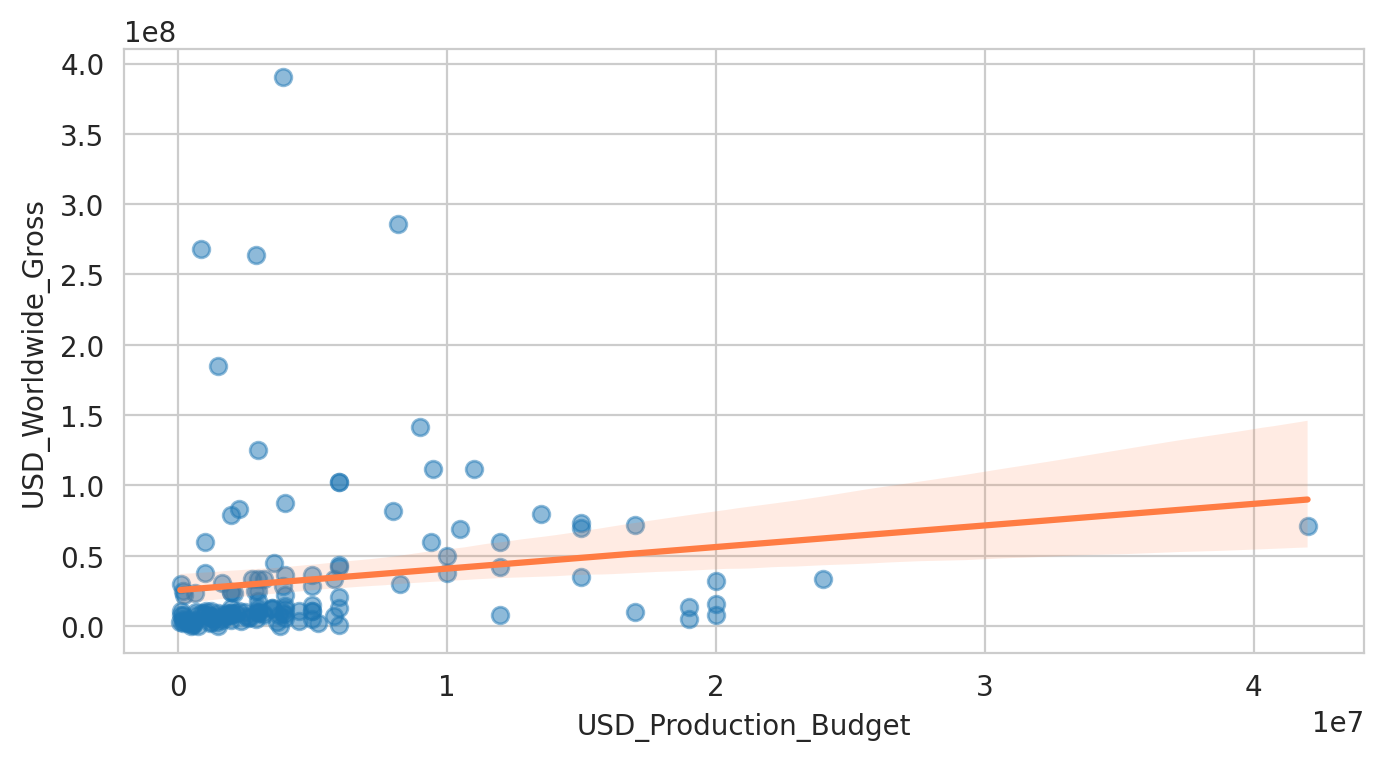

In [29]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(
        data=old_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        scatter_kws = {'alpha': 0.5},
        line_kws = {'color': '#ff7c43'},
    )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

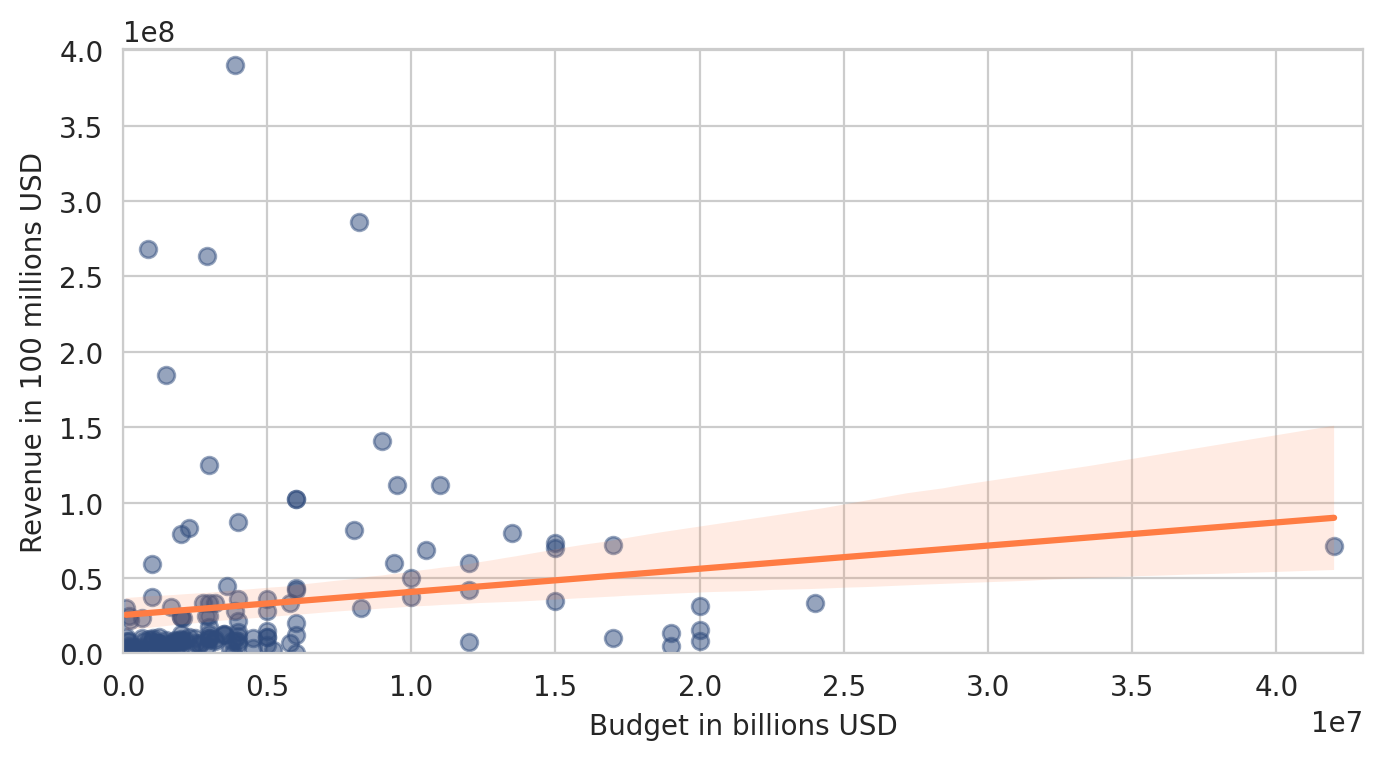

In [30]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    ax = sns.regplot(
        data=old_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        scatter_kws = {'alpha': 0.5, 'color': '#2f4b7c'},
        line_kws = {'color': '#ff7c43'},
    )
    ax.set(
        xlabel='Budget in billions USD',
        ylabel='Revenue in 100 millions USD',
        xlim=(0, (old_films.USD_Production_Budget.max() + 1_000_000)),
        ylim=(0, (old_films.USD_Worldwide_Gross.max() + 10_000_000)),
    )

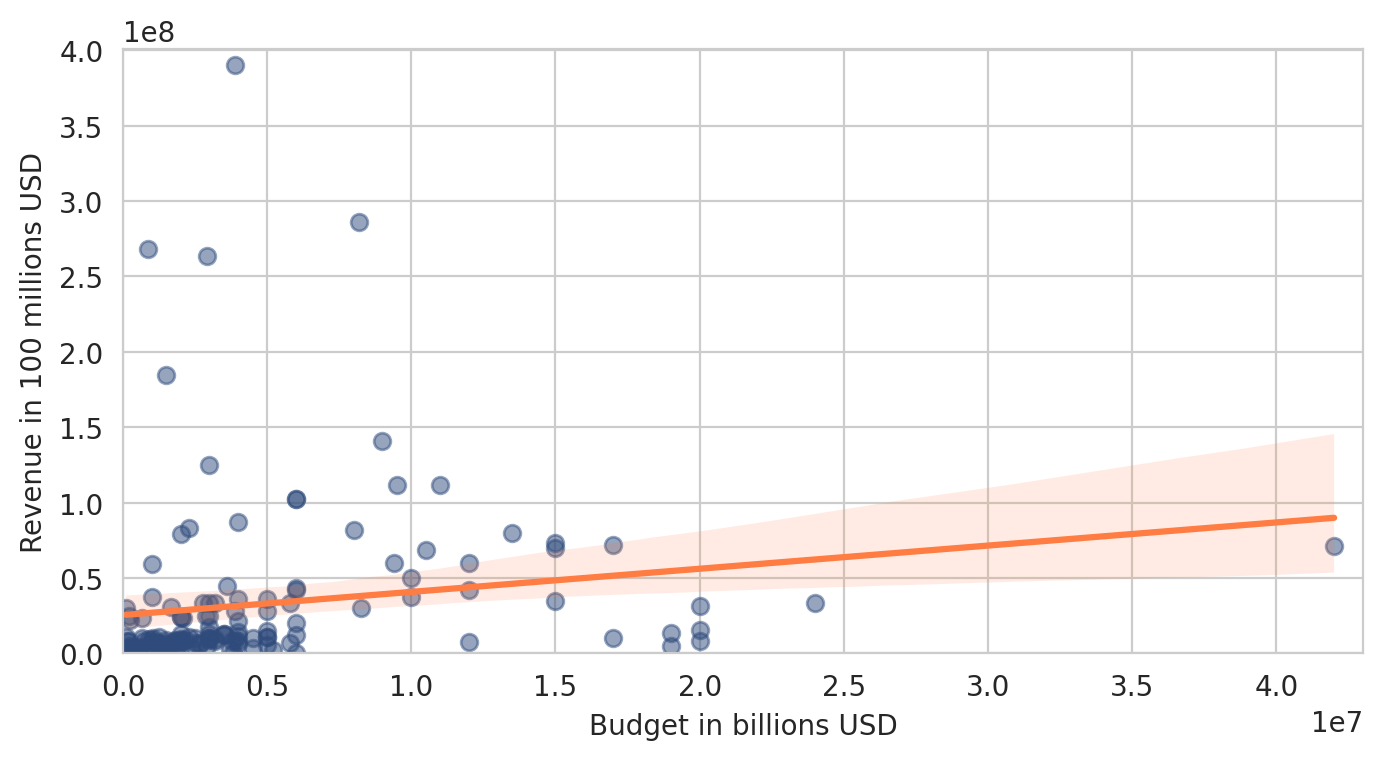

In [31]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    ax = sns.regplot(
        data=old_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        scatter_kws = {'alpha': 0.5, 'color': '#2f4b7c'},
        line_kws = {'color': '#ff7c43'},
    )
    ax.set(
        xlabel='Budget in billions USD',
        ylabel='Revenue in 100 millions USD',
        xlim=(0, (old_films.USD_Production_Budget.max() + 1_000_000)),
        ylim=(0, (old_films.USD_Worldwide_Gross.max() + 10_000_000)),
    )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [34]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [52]:
### LinearRegression() does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget) ==> create new DataFrames
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
lin_regression = LinearRegression().fit(X, y)

In [48]:
lin_regression.intercept_

array([-7708603.78918418])

In [49]:
lin_regression.coef_

array([[3.1249338]])

In [60]:
# R-squared
print(f'R² => {lin_regression.score(X, y)} => model explains about 21% of the variance in movie revenue')

R² => -0.20955595710758135 => model explains about 21% of the variance in movie revenue


In [58]:
X2 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y2 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
lin_reg2 = LinearRegression().fit(X2, y2)
print(f'R² => {lin_reg2.score(X2, y2)} => model explains about 2.5% of the variance in movie revenue')
print(f'Intercept => {lin_reg2.intercept_}')
print(f'slope_coefficient = > {lin_reg2.coef_}')

R² => 0.025579994168140385 => model explains about 2.5% of the variance in movie revenue
Intercept => [25457513.26706699]
slope_coefficient = > [[1.53565721]]


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [68]:
budget = 350_000_000
rev_estimate = lin_reg2.intercept_[0] + lin_reg2.coef_[0, 0] * budget
rev_estimate

562937537.7994392

In [75]:
rev_estimate = round(rev_estimate, -6)
print(f'The estimated revenue for a $350000000 film is around ${rev_estimate:.10}.')

The estimated revenue for a $350000000 film is around $563000000.0.


In [ ]:
1_086_000_000